<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/MnistUsingANN(day15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv('mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = df.iloc[:, 1:].values / 255.0
Y_train =df.iloc[:, 0].values

In [14]:
test_df = pd.read_csv("mnist_test.csv")

In [15]:
X_test = test_df.iloc[:, 1:].values / 255.0
Y_test = test_df.iloc[:, 0].values

In [16]:
from tensorflow.keras import utils

Y_train=utils.to_categorical(Y_train,10)
Y_test=utils.to_categorical(Y_test,10)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [20]:
model=Sequential(
    [
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8709 - loss: 0.4292 - val_accuracy: 0.9686 - val_loss: 0.0974
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9644 - loss: 0.1149 - val_accuracy: 0.9744 - val_loss: 0.0798
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9746 - loss: 0.0812 - val_accuracy: 0.9773 - val_loss: 0.0742
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9779 - val_loss: 0.0688
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9839 - loss: 0.0514 - val_accuracy: 0.9797 - val_loss: 0.0708
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9811 - val_loss: 0.0659
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9863 - loss: 0.0430 - val_accuracy: 0.9817 - val_loss: 0.0669
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9882 - loss: 0.0371 - 

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(Y_test, axis=1)
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.96      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



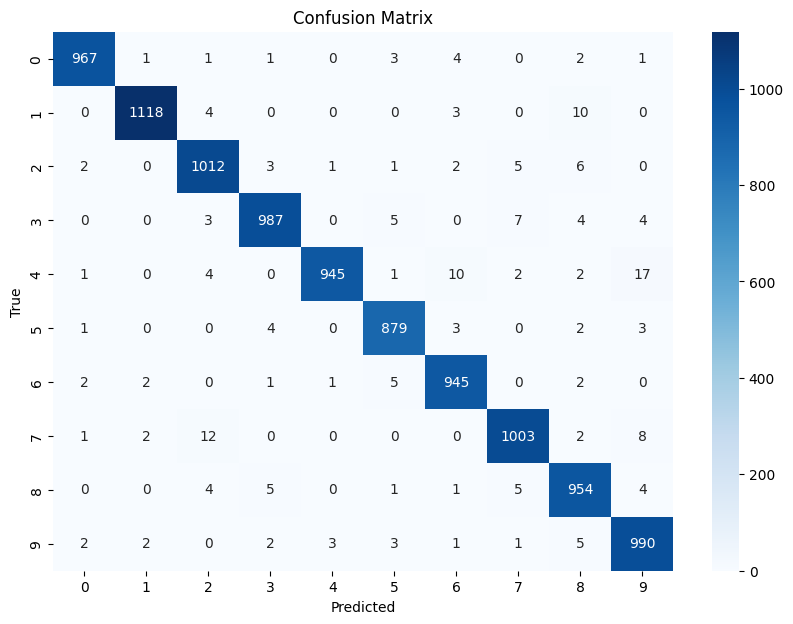

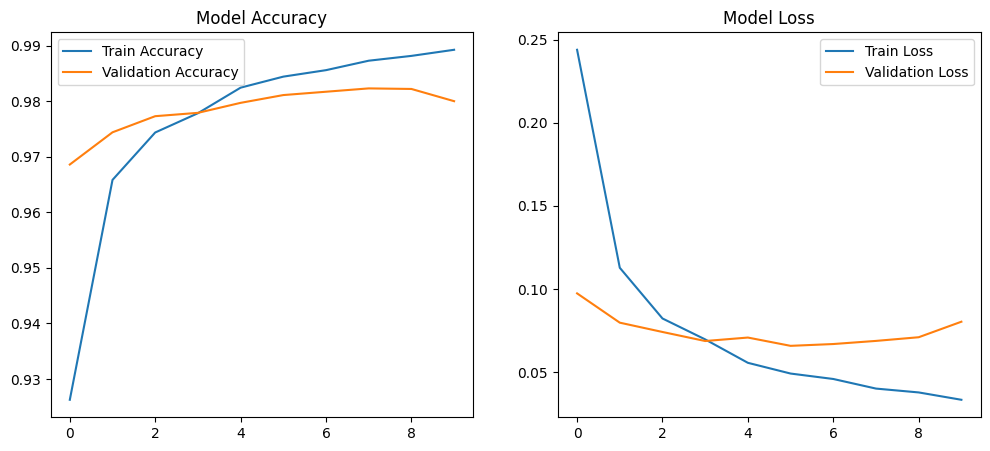

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

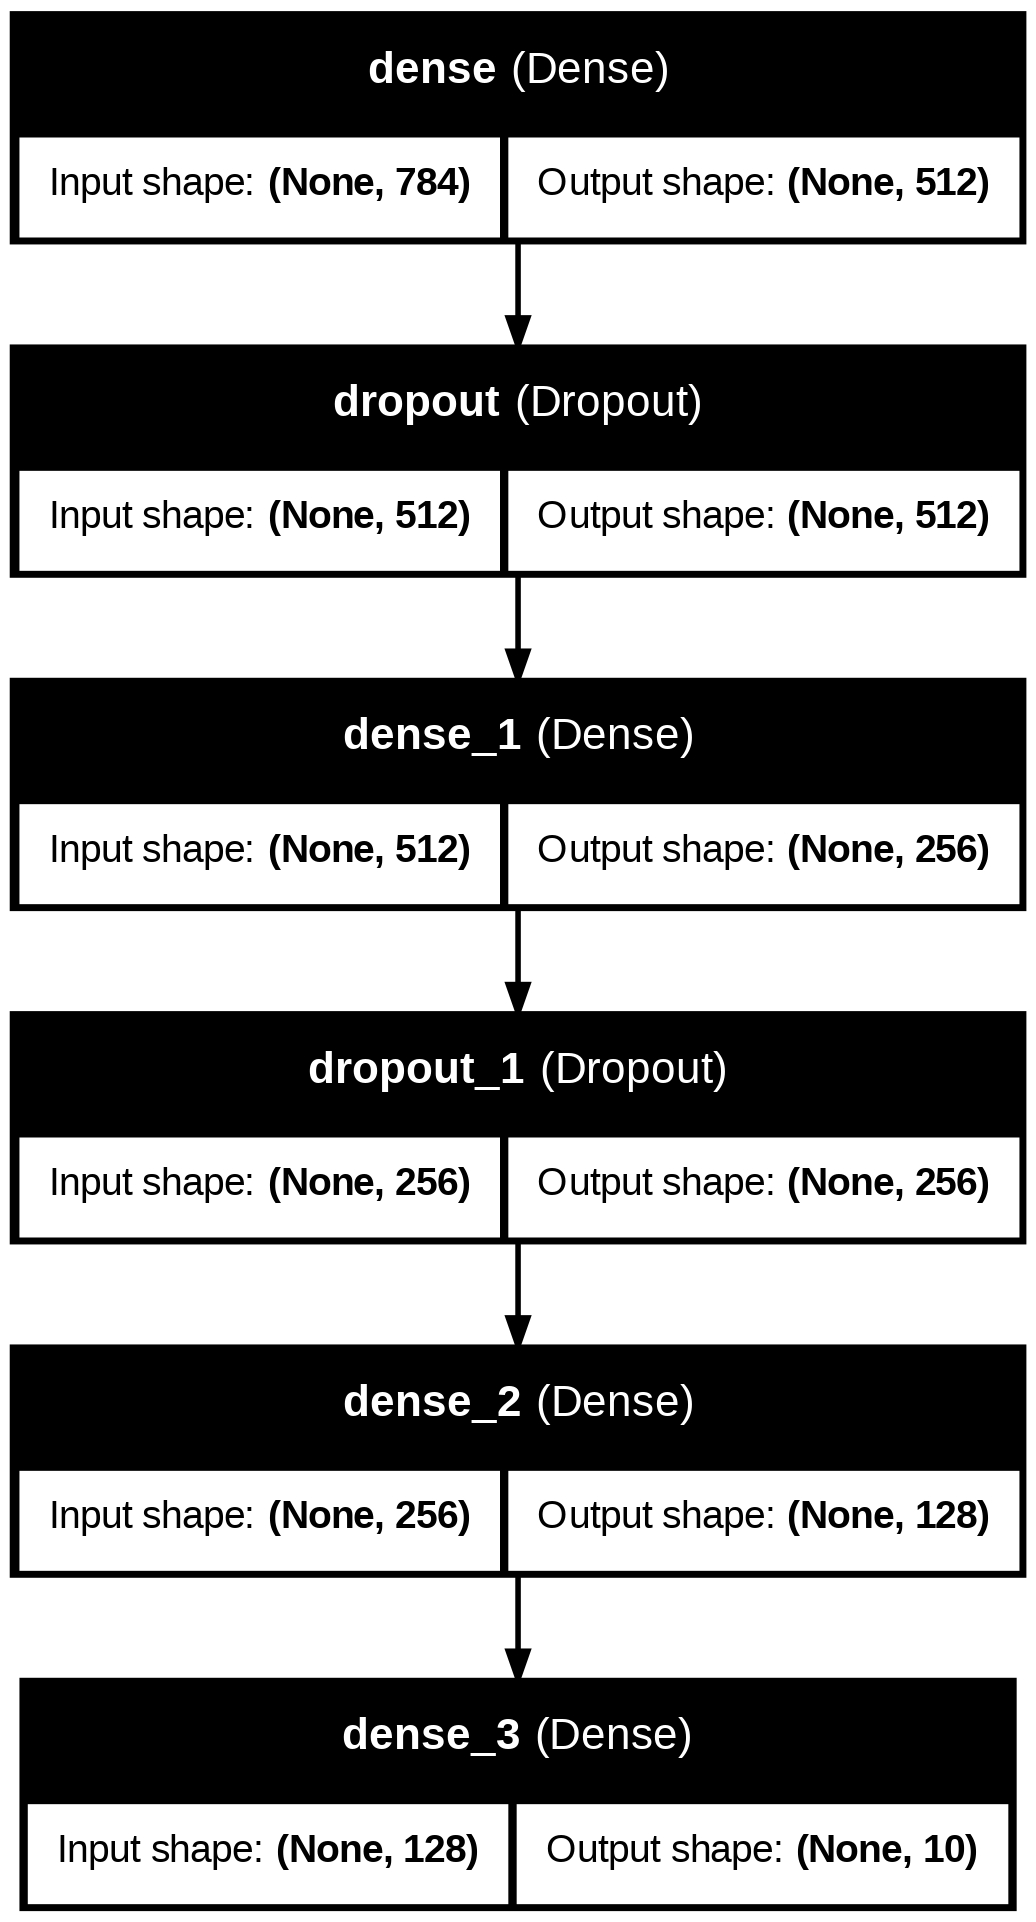

In [25]:

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
